In [1]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras


Using TensorFlow backend.
C:\Users\sony\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sony\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sony\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sony\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [2]:
data =pd.read_excel('reg.xlsx')


In [3]:
y = data['Y']


In [4]:
X = data.drop(["Y"],axis=1)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 1)

In [6]:
ortalama=X_train.mean(axis=0)
StS=X_train.std(axis=0)

X_train -= ortalama
X_train /=StS

X_train

,A,B,C,D,E,F,G,H,J,K,L,M
222,0.950487,1.219109,0.460604,0.765518,0.963469,2.395887,0.779212,2.409903,-0.107032,-0.263480,-0.540739,1.385857
249,-0.644080,-1.725650,-1.418511,-0.404830,0.347580,-0.494174,-1.581317,-0.881109,-0.489073,-0.364387,-0.707495,-1.678603
161,0.950487,1.000806,0.962941,0.326638,1.060178,-0.453033,0.279461,0.448158,0.127953,-0.437119,-0.707495,0.895543
16,0.153203,0.698899,0.348973,1.049500,-1.203478,-0.448331,1.512890,0.865223,0.000606,2.894784,0.626551,0.711676
208,-0.644080,-1.346640,-0.767332,-0.189692,0.196731,1.874767,-0.241557,-0.856493,-0.329889,-0.225337,-0.651910,-1.310868
...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.644080,-1.085607,-0.618492,-0.508096,0.194880,-0.500834,-0.018264,-0.811848,0.070344,-0.288299,-0.614853,-1.249578
255,-0.644080,-0.691733,-1.306880,0.481537,-1.344610,-0.505928,-1.060299,-0.940236,0.694950,-0.372331,0.311568,-0.697976
72,0.153203,0.634802,0.944336,0.472931,0.498429,2.207814,1.130102,0.682843,-0.205574,0.210117,-0.299870,0.037495
235,0.153203,0.290163,-0.060339,0.266399,0.388300,-0.489472,0.247562,-0.743167,0.337166,-0.114957,-0.299870,0.343941


In [7]:
ortalama=X_test.mean(axis=0)
StS=X_test.std(axis=0)

X_test -= ortalama
X_test /=StS


In [8]:
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))  # ilk katmanda sütun sayısı kadar düğüm olacağı için X_train.shape[1]
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2600      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,verbose=1)


Epoch 1/50
255/255 [==============================] - 0s 2ms/step - loss: 1769914.1044
Epoch 2/50
255/255 [==============================] - 0s 118us/step - loss: 1762385.7637
Epoch 3/50
255/255 [==============================] - 0s 122us/step - loss: 1743475.0162
Epoch 4/50
255/255 [==============================] - 0s 118us/step - loss: 1695975.7833
Epoch 5/50
255/255 [==============================] - 0s 122us/step - loss: 1598158.2388
Epoch 6/50
255/255 [==============================] - 0s 129us/step - loss: 1437603.3966
Epoch 7/50
255/255 [==============================] - 0s 137us/step - loss: 1224587.2706
Epoch 8/50
255/255 [==============================] - 0s 133us/step - loss: 1067313.7794
Epoch 9/50
255/255 [==============================] - 0s 180us/step - loss: 1083235.5772
Epoch 10/50
255/255 [==============================] - 0s 153us/step - loss: 1056661.8980
Epoch 11/50
255/255 [==============================] - 0s 118us/step - loss: 1043181.3456
Epoch 12/50
255/255 

In [12]:
mse_train=model.evaluate(X_train, y_train)
mse_train

255/255 [==============================] - 1s 5ms/step


931665.8264705882

In [13]:
mse_test=model.evaluate(X_test,y_test)
mse_test

45/45 [==============================] - 0s 200us/step


1076790.663888889

In [14]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

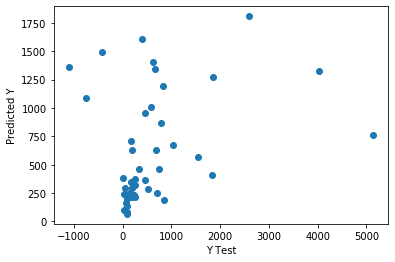

In [15]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.05576820892663559